In [2]:
import re
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
DIR_PATH = "dataset/rollingsales/"
datas = []
CLEAN =["apart_ment_number","zip_code","block","lot","ease_ment","address","residential_units","commercial_units"]
def find_path(value: str):
    return re.search("(?<=_)(.*?)(?=\.)", value).group(0)


def build_type_category(category: str):
    type_buffer = ""
    building_types = ["homes", "condos", "apartments", "buildings", "residential", "factories", "garages",
                           "warehouses", "land", "facilities"]
    for type in building_types:
        if type.upper() in category:
            type_buffer = type
            break
    return type_buffer.capitalize() if type_buffer != "" else "Other"


for path in os.listdir(DIR_PATH):
    borough_name = find_path(path)
    data = pd.read_excel(str(DIR_PATH + path), skiprows=4)
    data.columns = [column.lower().replace("\n", " ").replace("-", " ").replace(" ", "_") for column in
                    data.columns]
    data.borough = borough_name
    purified_data = data.drop(CLEAN,axis=1)
    filtered_data = purified_data[(purified_data.total_units >0) & (purified_data.land_square_feet > 0)]
    filtered_data['quantile'] = pd.qcut(filtered_data.sale_price, 10, labels=False, duplicates='drop')
    good = filtered_data[(filtered_data['quantile'] > 0) & (filtered_data['quantile'] < 10)]
    datas.append(good)

datas = pd.concat(datas)
datas.insert(3, "type_building", [build_type_category(category) for category in datas.building_class_category.to_list()])
datas.insert(len(datas.columns)-1, "quarter_group", [str(value.quarter) + "-quarter" for value in datas.sale_date.to_list()])
datas['price_per_feet'] = datas.sale_price / datas.land_square_feet
datas = datas[datas['price_per_feet'] > 0]
datas

C:\Users\garik\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\garik\AppData\Local\Temp\ipykernel_11780\1268078602.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantile'] = pd.qcut(filtered_data.sale_price, 10, labels=False, duplicates='drop')
C:\Users\garik\AppData\Local\Temp\ipykernel_11780\1268078602.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,borough,neighborhood,building_class_category,type_building,tax_class_at_present,building_class_at_present,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,quarter_group,quantile,price_per_feet
0,bronx,BATHGATE,01 ONE FAMILY HOMES,Homes,1,A5,1,1842,2048,1901,1,A5,355000,2013-07-08,3-quarter,3,192.725299
1,bronx,BATHGATE,01 ONE FAMILY HOMES,Homes,1,A1,1,1103,1290,1910,1,A1,474819,2013-05-20,2-quarter,4,430.479601
2,bronx,BATHGATE,01 ONE FAMILY HOMES,Homes,1,A1,1,1986,1344,1899,1,A1,210000,2013-03-12,1-quarter,1,105.740181
3,bronx,BATHGATE,01 ONE FAMILY HOMES,Homes,1,A1,1,2329,1431,1901,1,A1,343116,2013-07-01,3-quarter,2,147.323315
5,bronx,BATHGATE,02 TWO FAMILY HOMES,Homes,1,B1,2,2000,2400,1993,1,B1,316500,2012-12-27,4-quarter,2,158.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,statenisland,WOODROW,02 TWO FAMILY HOMES,Homes,1,B2,2,5610,1670,1994,1,B2,560000,2013-04-18,2-quarter,4,99.821747
6349,statenisland,WOODROW,02 TWO FAMILY HOMES,Homes,1,B2,2,7525,2160,1994,1,B2,520000,2013-06-18,2-quarter,4,69.102990
6351,statenisland,WOODROW,02 TWO FAMILY HOMES,Homes,1,B9,2,2590,2450,1998,1,B9,505000,2013-05-15,2-quarter,4,194.980695
6354,statenisland,WOODROW,22 STORE BUILDINGS,Buildings,4,K6,1,21663,6950,2008,4,K6,1300000,2013-05-29,2-quarter,5,60.010156


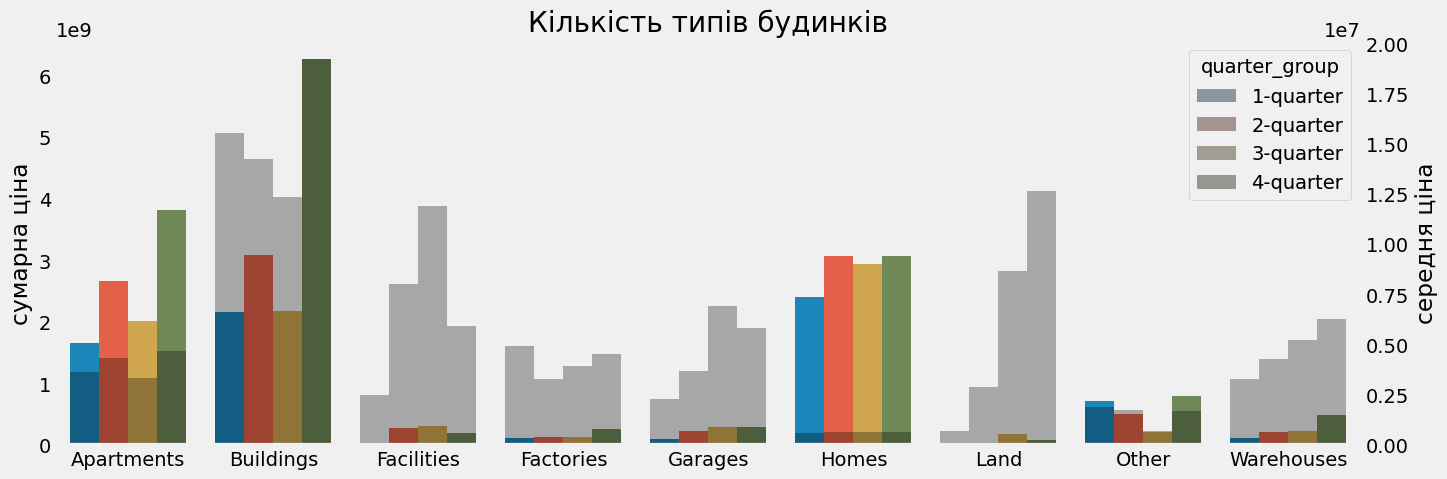

In [3]:
group_by_type_building = datas.groupby(["quarter_group","type_building"], as_index=False)
fig, ax=plt.subplots(figsize=(15,5))
group_by_type_building_mean = group_by_type_building.mean()
group_by_type_building_sum = group_by_type_building.sum()
ax=sns.barplot(data=group_by_type_building_sum,
                x=group_by_type_building_sum.type_building,
                y=group_by_type_building_sum.sale_price,
                hue=group_by_type_building_sum.quarter_group,
                zorder=2)
ax2 = ax.twinx()
ax2=sns.barplot(data=group_by_type_building_mean,
                x=group_by_type_building_mean.type_building,
                y=group_by_type_building_mean.sale_price,
                zorder=2,
                hue=group_by_type_building_sum.quarter_group,
                palette=['black','black','black','black'],
                alpha=0.3,
                linewidth=1.5)
ax.set(title="Кількість типів будинків", xlabel=None, ylabel="сумарна ціна")
ax2.set(xlabel=None, ylabel="середня ціна")
ax.grid(False)
ax2.grid(False)

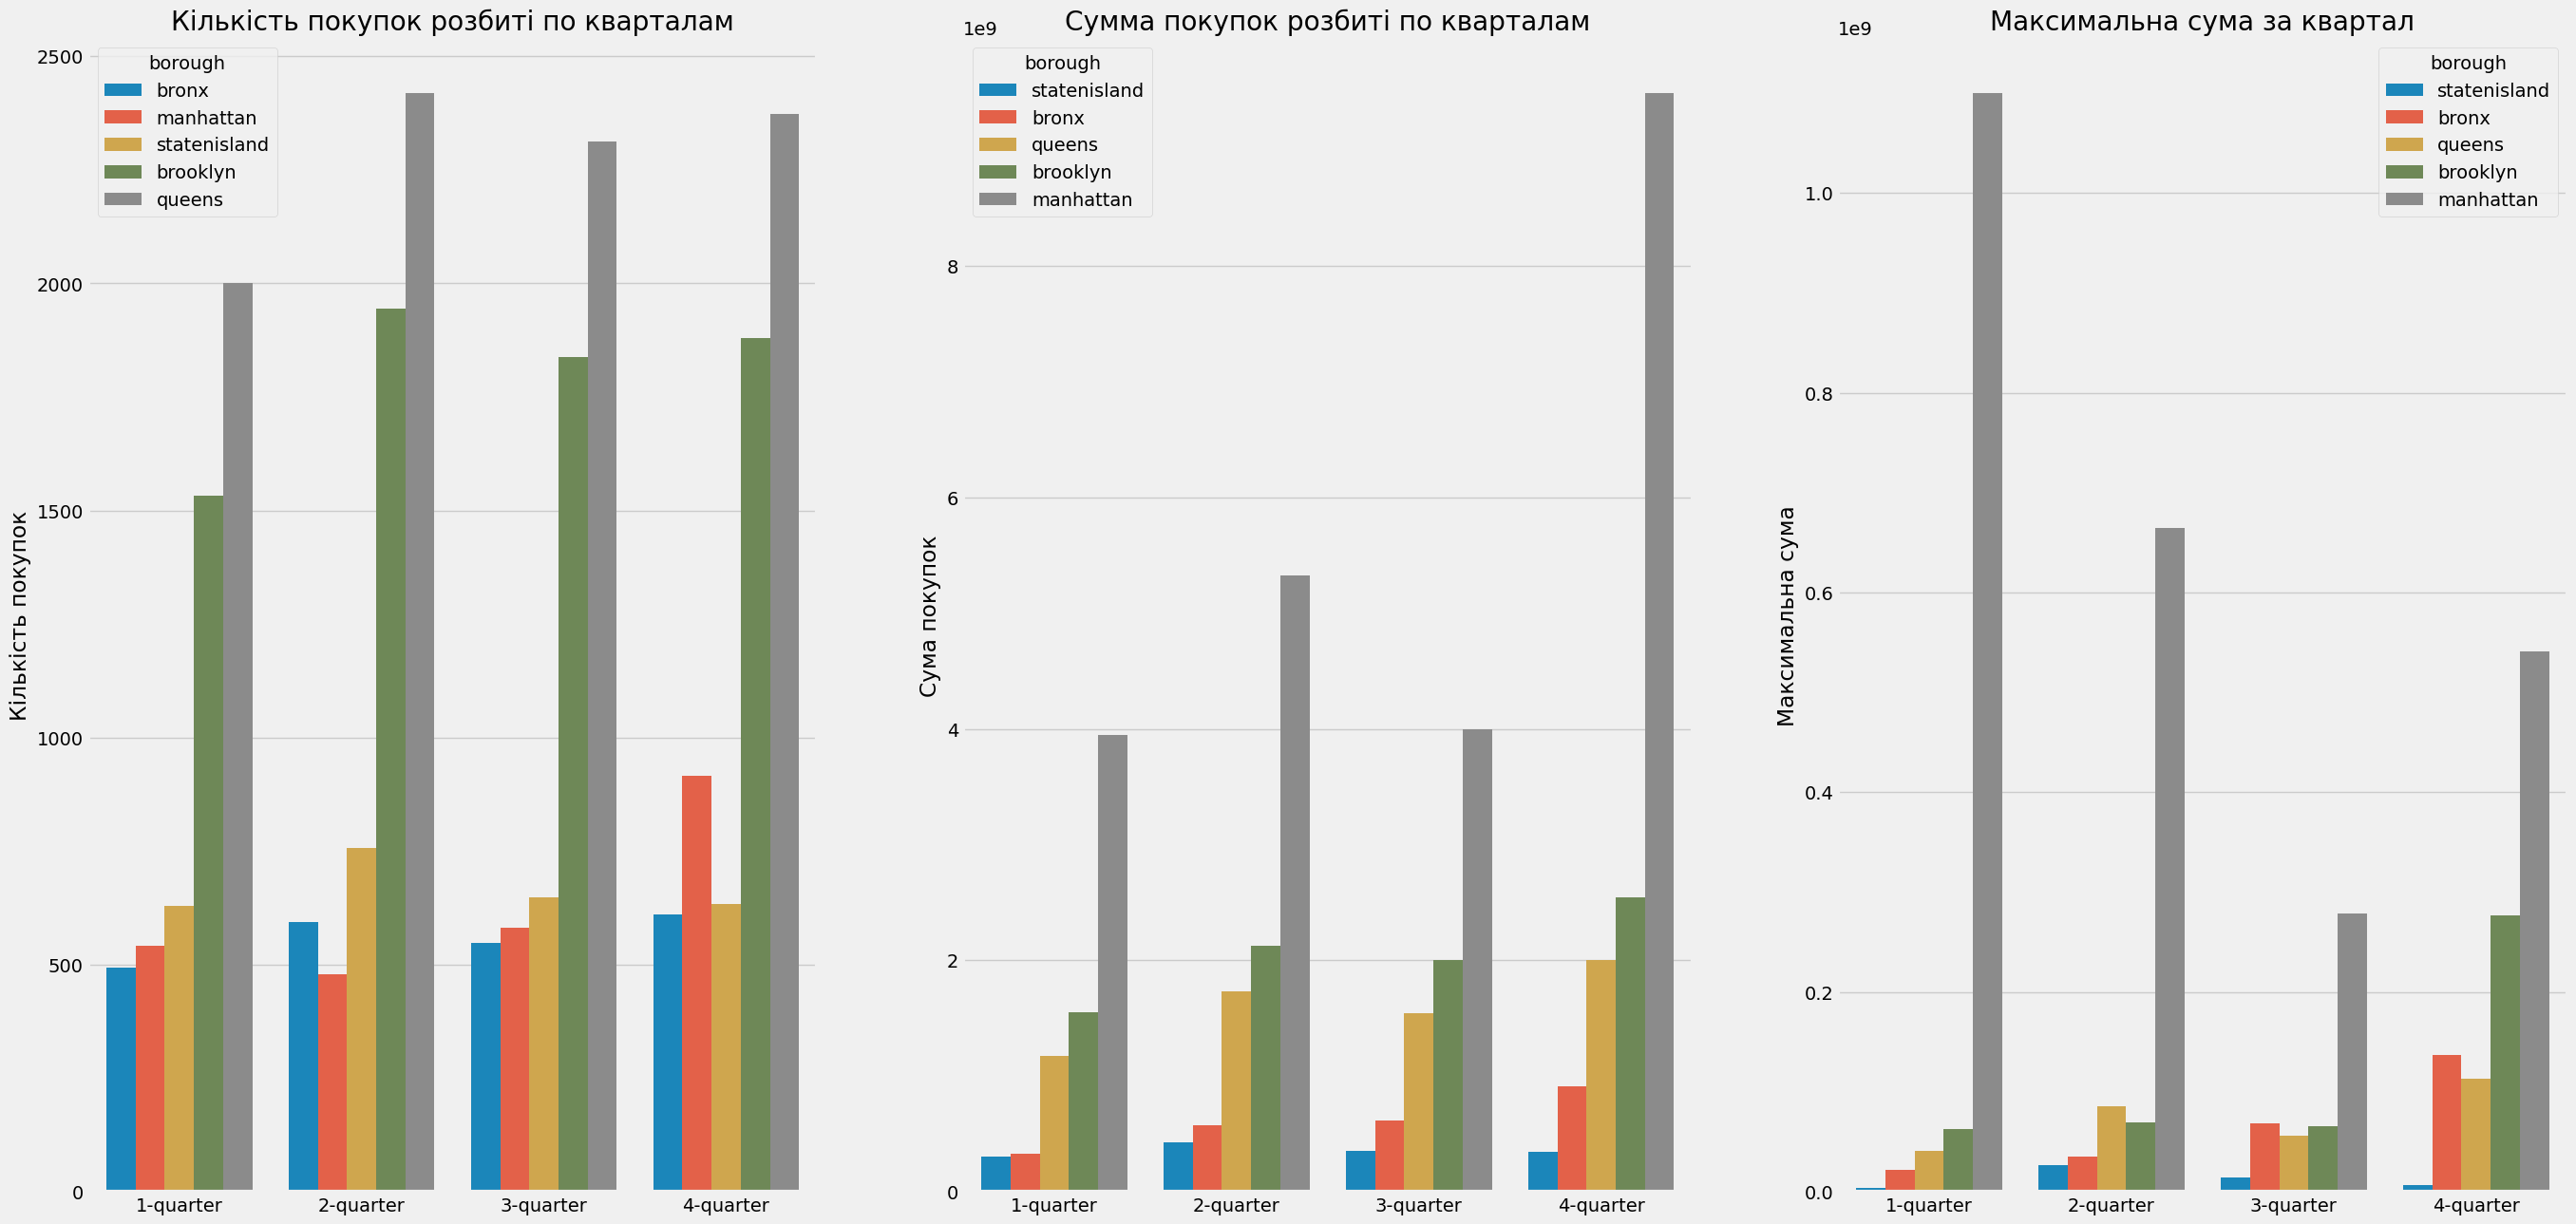

In [4]:
group_by_sale_quarter = datas.groupby(["quarter_group", "borough"], as_index=False)
fig, axes=plt.subplots(1,3,figsize=(30,15))
groups_titles=["Кількість покупок розбиті по кварталам", "Сумма покупок розбиті по кварталам", "Максимальна сума за квартал"]
y_labels=["Кількість покупок", "Сума покупок", "Максимальна сума"]
groups = [group_by_sale_quarter.count().sort_values(["quarter_group","sale_price"]), 
          group_by_sale_quarter.sum().sort_values(["quarter_group","sale_price"]),
          group_by_sale_quarter.sale_price.max().sort_values(["quarter_group","sale_price"])]
for index,group in enumerate(groups):
    sns.barplot(ax=axes[index],
                data=group,
                x=group.quarter_group,
                y=group.sale_price,
                hue=group.borough,)
    axes[index].set(xlabel="", title=groups_titles[index], ylabel=y_labels[index])

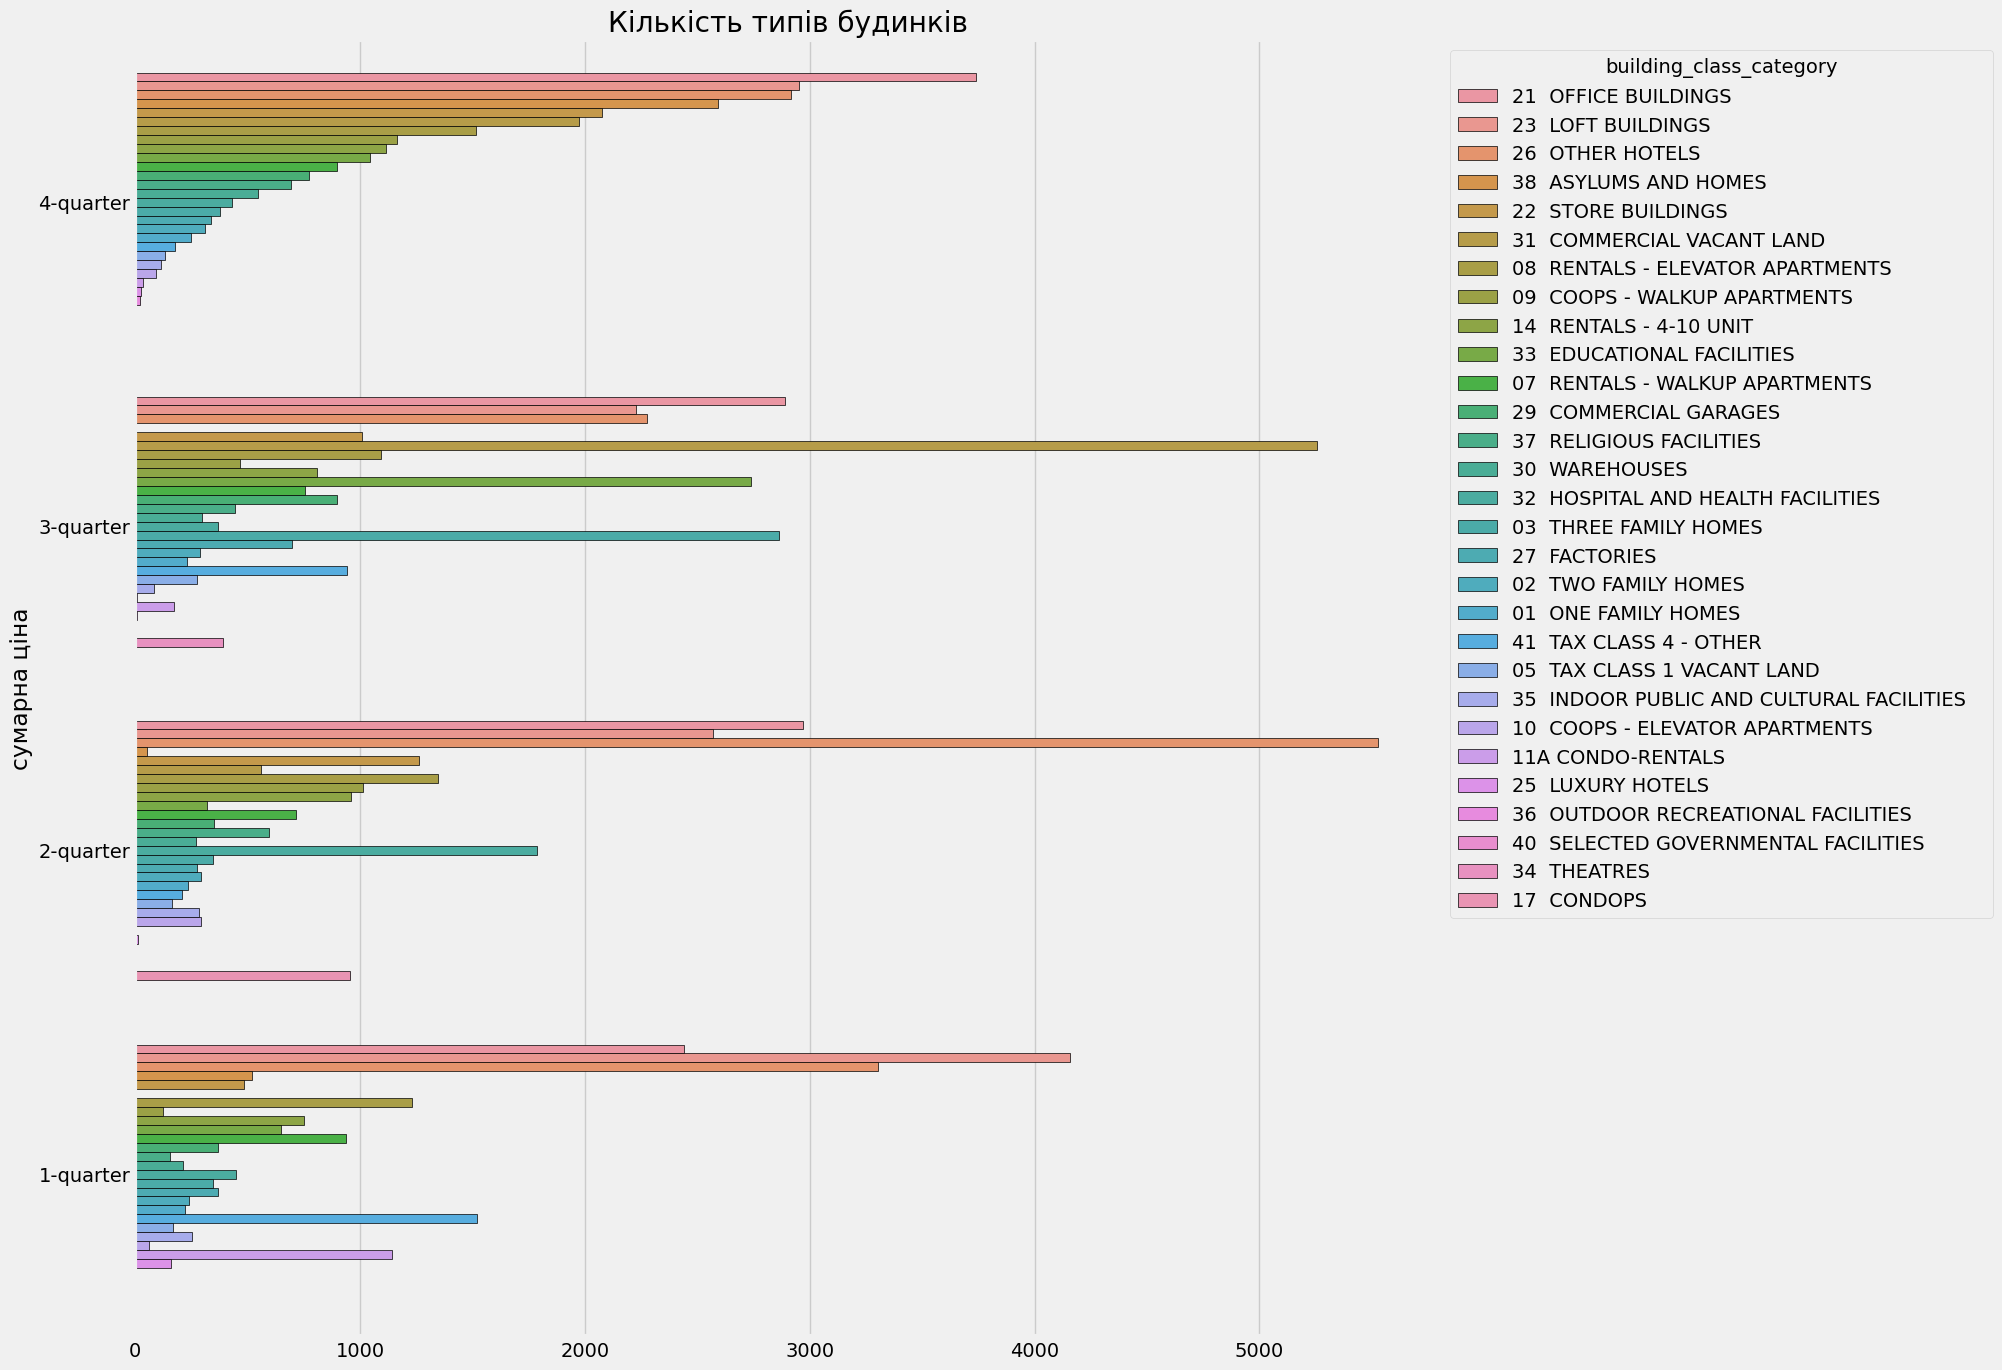

In [7]:
group_by_type_building = datas.groupby(["quarter_group","building_class_category"], as_index=False)
fig, ax=plt.subplots(figsize=(15,16))
group_by_type_building_sum = group_by_type_building.mean().sort_values(["quarter_group","price_per_feet"], ascending=False)
ax=sns.barplot(data=group_by_type_building_sum,
                y=group_by_type_building_sum.quarter_group,
                x=group_by_type_building_sum.price_per_feet,
                hue=group_by_type_building_sum.building_class_category,
                zorder=2,
                edgecolor="black",
                linewidth=0.5,
                antialiased=True,
                capsize=.4,
                )
ax.set(title="Кількість типів будинків", xlabel=None, ylabel="сумарна ціна")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

,borough,building_class_at_present,neighborhood
270,manhattan,R4,5855
298,queens,A1,2177
165,brooklyn,R4,1675
278,manhattan,RH,1581
302,queens,A5,1282
368,queens,R4,1254
99,brooklyn,C0,1252
236,manhattan,H2,1223
95,brooklyn,B1,1202
308,queens,B3,1037


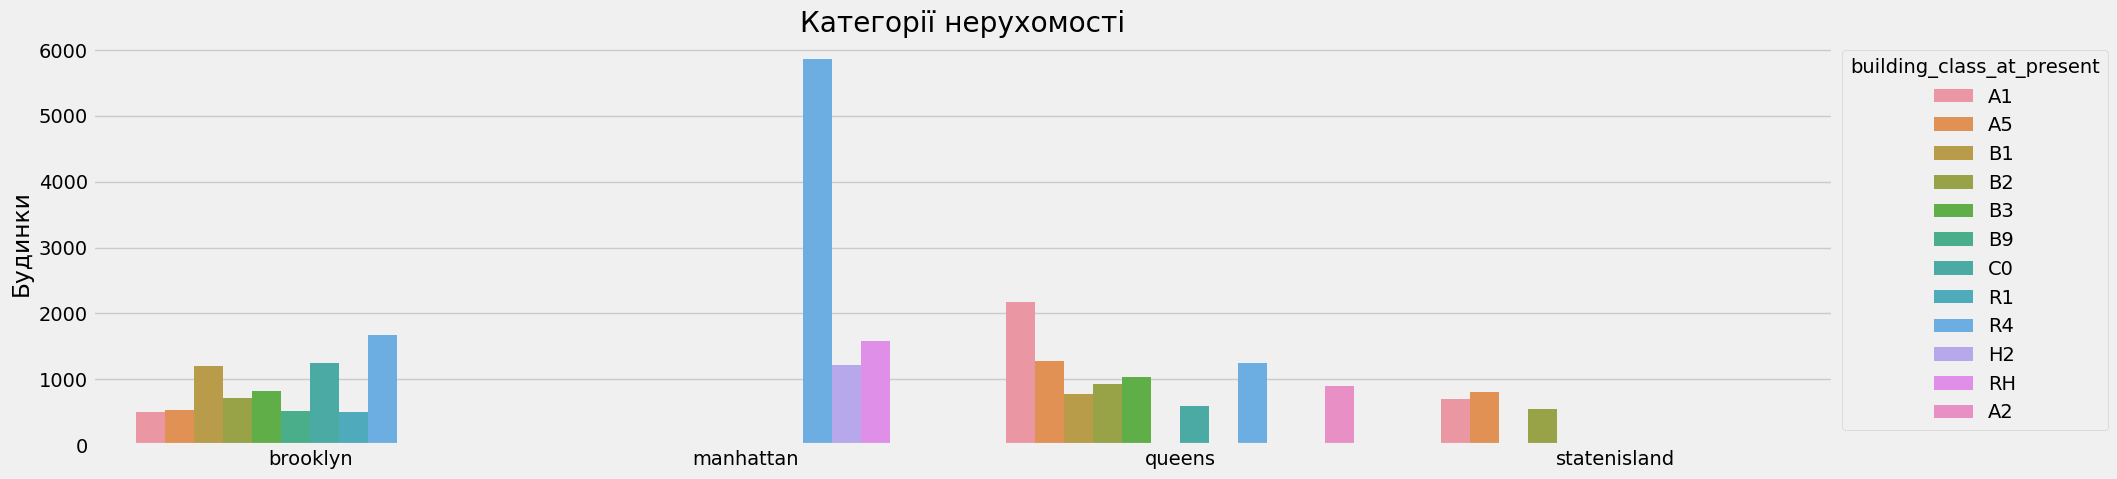

In [86]:
group_by_type_building_class = datas.groupby(["borough","building_class_at_present"], as_index=False).count()
group_by_type_building_class = group_by_type_building_class[group_by_type_building_class.sale_price >500]
fig, ax=plt.subplots(figsize=(20,5))
sns.barplot(data=group_by_type_building_class,
                x=group_by_type_building_class.borough,
                y=group_by_type_building_class.sale_price,
                hue=group_by_type_building_class.building_class_at_present,
                zorder=2)
ax.set(title="Категорії нерухомості", xlabel="", ylabel="Будинки")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
group_by_type_building_class.loc[:,["borough","building_class_at_present","neighborhood"]].sort_values(["neighborhood","borough"],ascending=False)

,borough,tax_class_at_present,neighborhood
25,queens,1,8395
8,brooklyn,1,6620
18,manhattan,2,6472
19,manhattan,4,3534
34,statenisland,1,3049
9,brooklyn,2,2293
0,bronx,1,1827
26,queens,2,1577
14,brooklyn,2A,844
10,brooklyn,4,677


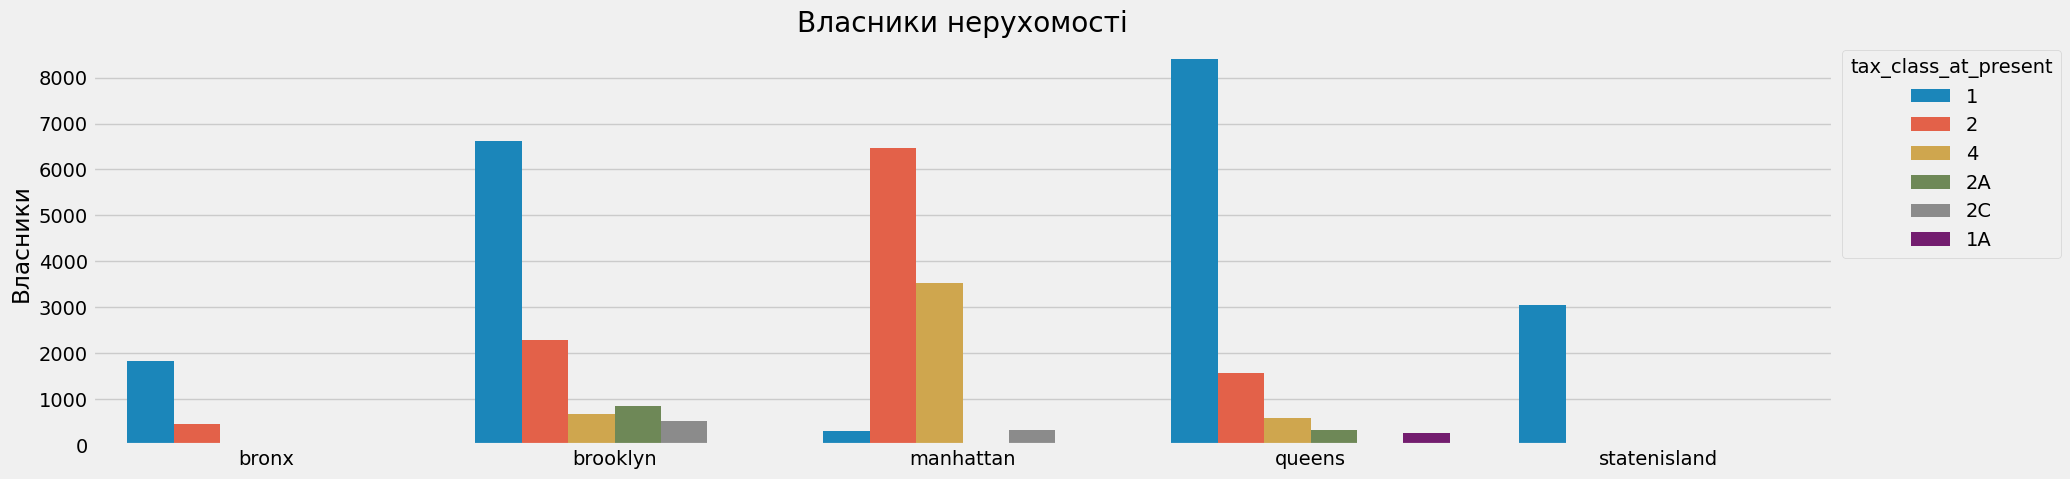

In [87]:
group_by_tax_class = datas.groupby(["borough","tax_class_at_present"], as_index=False).count()
group_by_tax_class = group_by_tax_class[group_by_tax_class.neighborhood > 250]
fig, ax=plt.subplots(figsize=(20,5))
sns.barplot(data=group_by_tax_class,
                x=group_by_tax_class.borough,
                y=group_by_tax_class.sale_price,
                hue=group_by_tax_class.tax_class_at_present,
                zorder=2)
ax.set(title="Власники нерухомості", xlabel="", ylabel="Власники")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
group_by_tax_class.loc[:,["borough","tax_class_at_present","neighborhood"]].sort_values(["neighborhood","borough"],ascending=False)

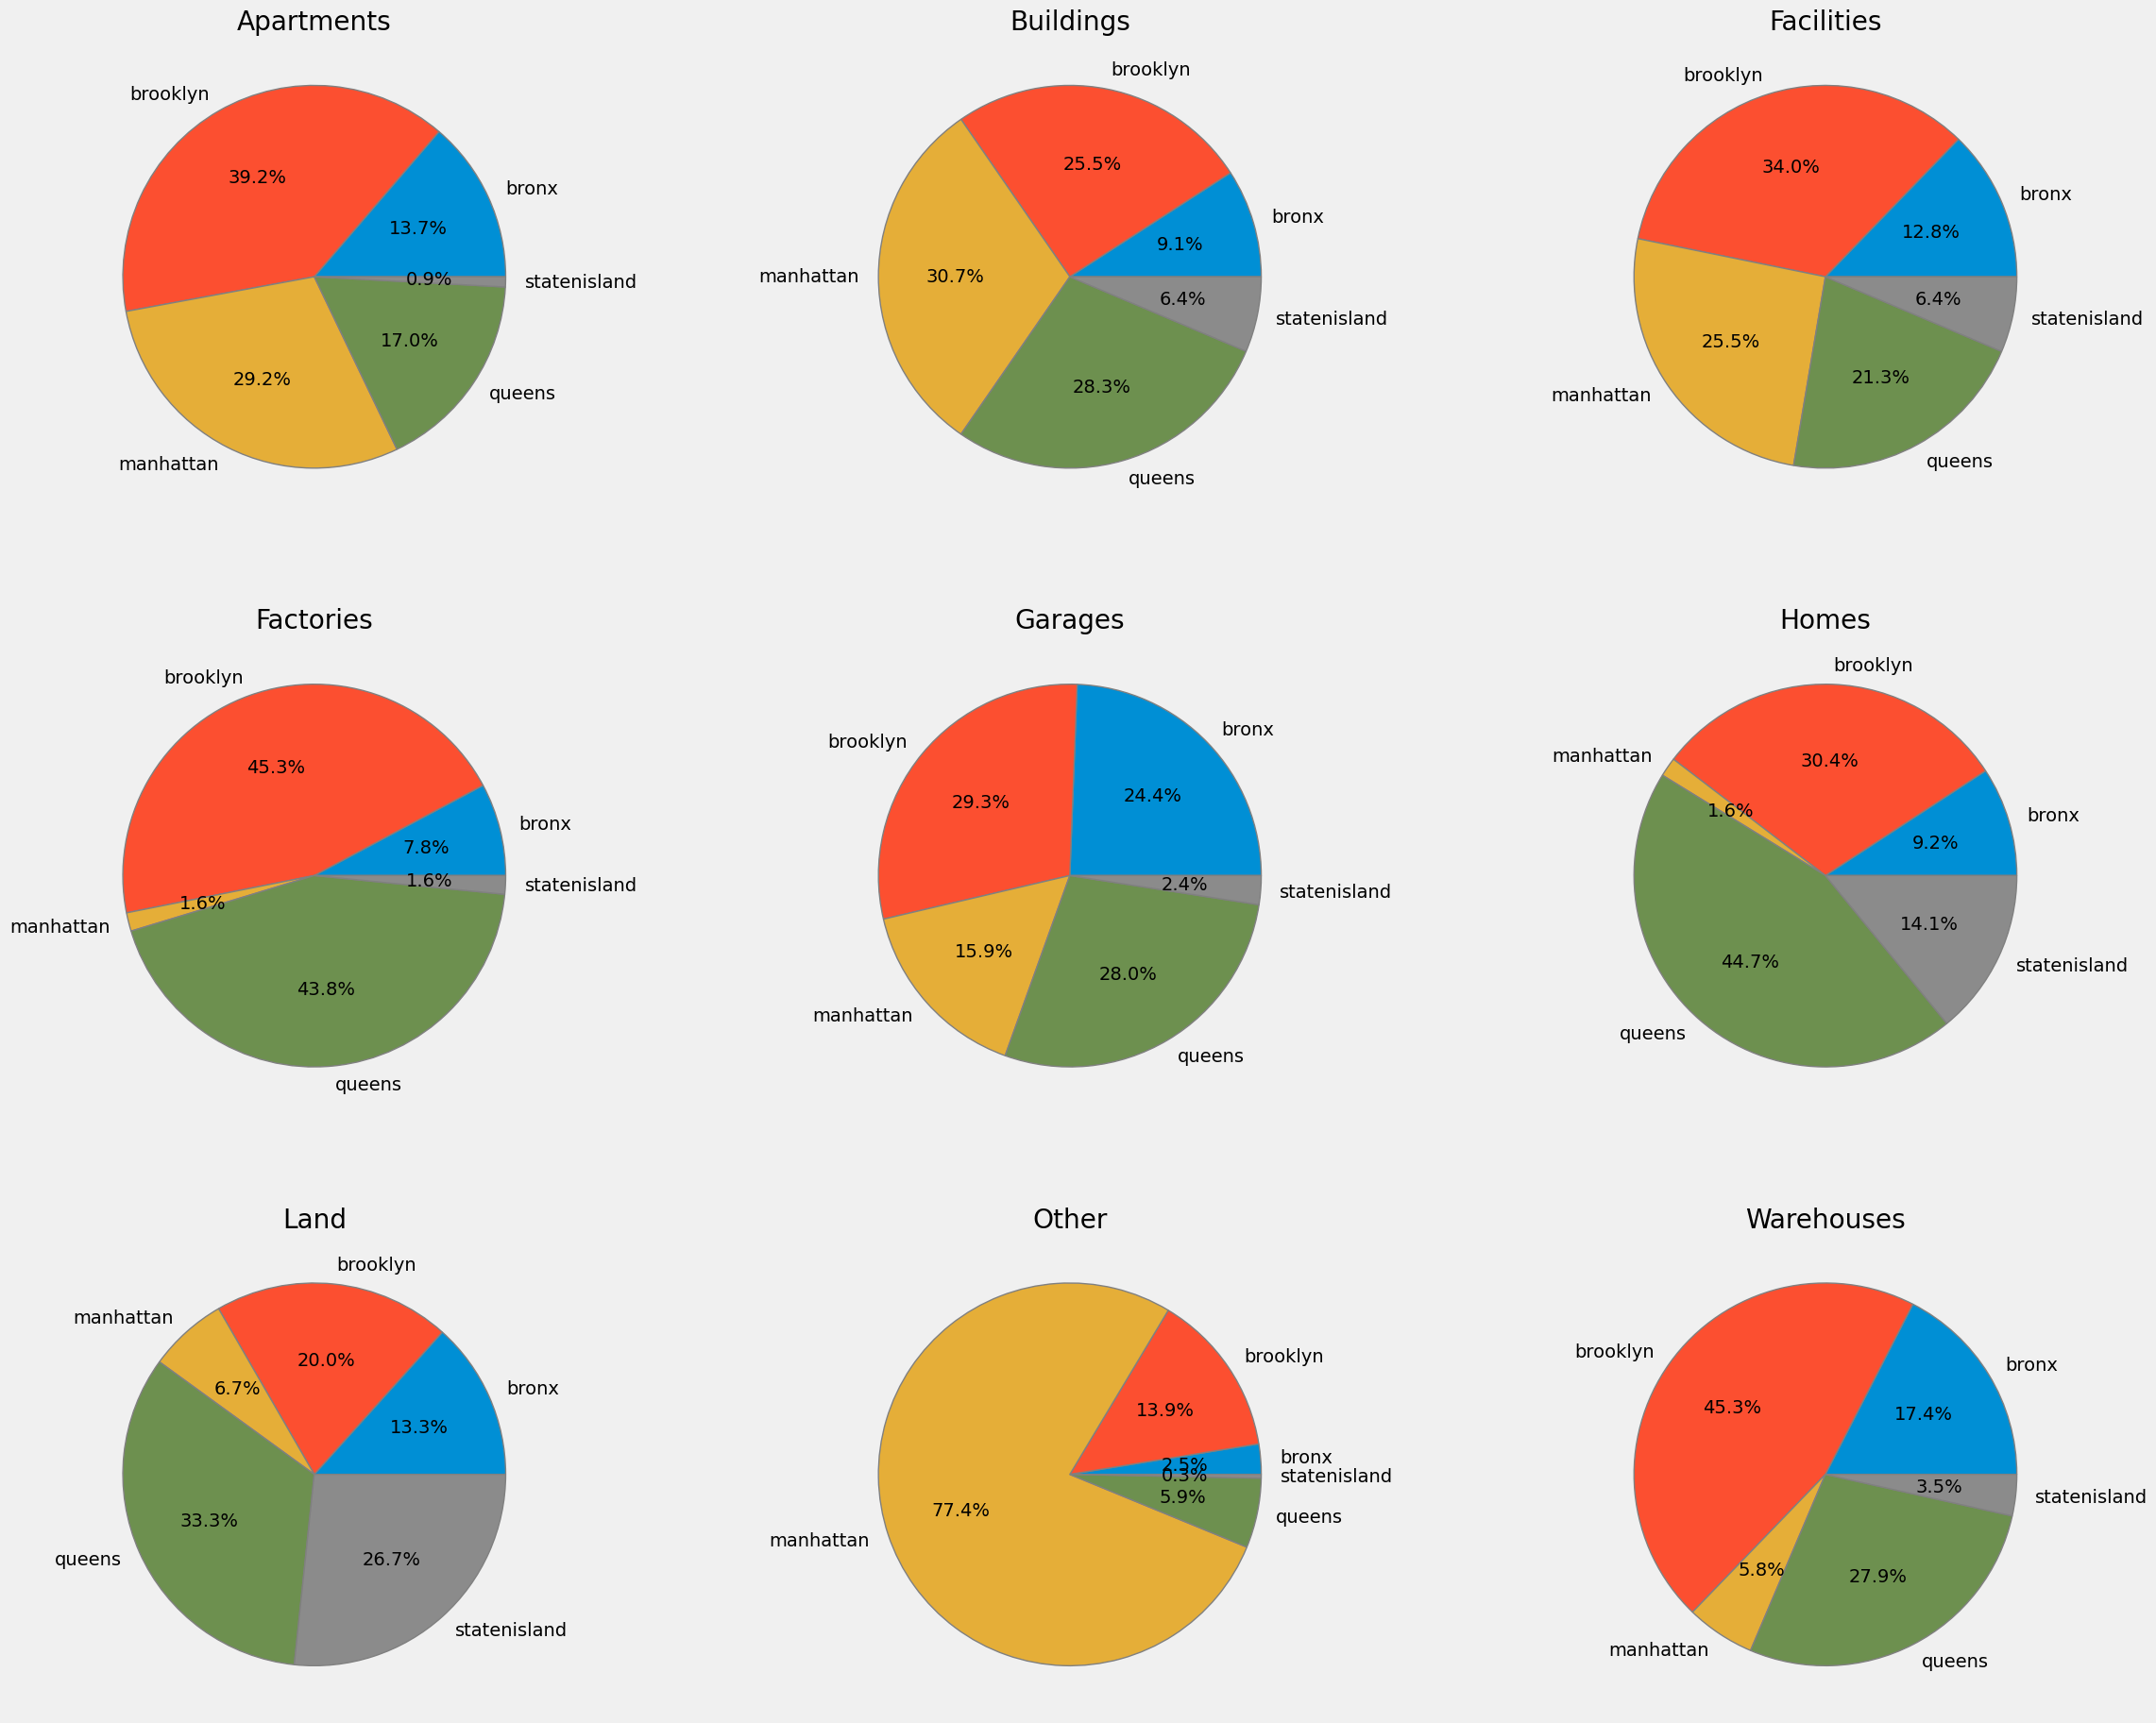

In [55]:
fig, axes = plt.subplots(3,3, figsize=(25,20))
group_by_type_building_index= datas.loc[:,["borough","type_building","neighborhood"]].groupby(["type_building","borough"]).count().apply(lambda x: (100 * x / x.sum()).round(2))
group_by_type_building_index.unstack(level=0).plot.pie(autopct='%1.1f%%',ax=axes,subplots=True,legend=False,wedgeprops = {"edgecolor" : "grey",
                      'linewidth': 1,
                      'antialiased': True,
                      })
titles = list(dict.fromkeys(datas.type_building.sort_values()))
for i, ax in enumerate(axes.flat):
    ax.get_yaxis().set_visible(False)
    ax.set(title=titles[i])
fig.tight_layout(pad=5.0)

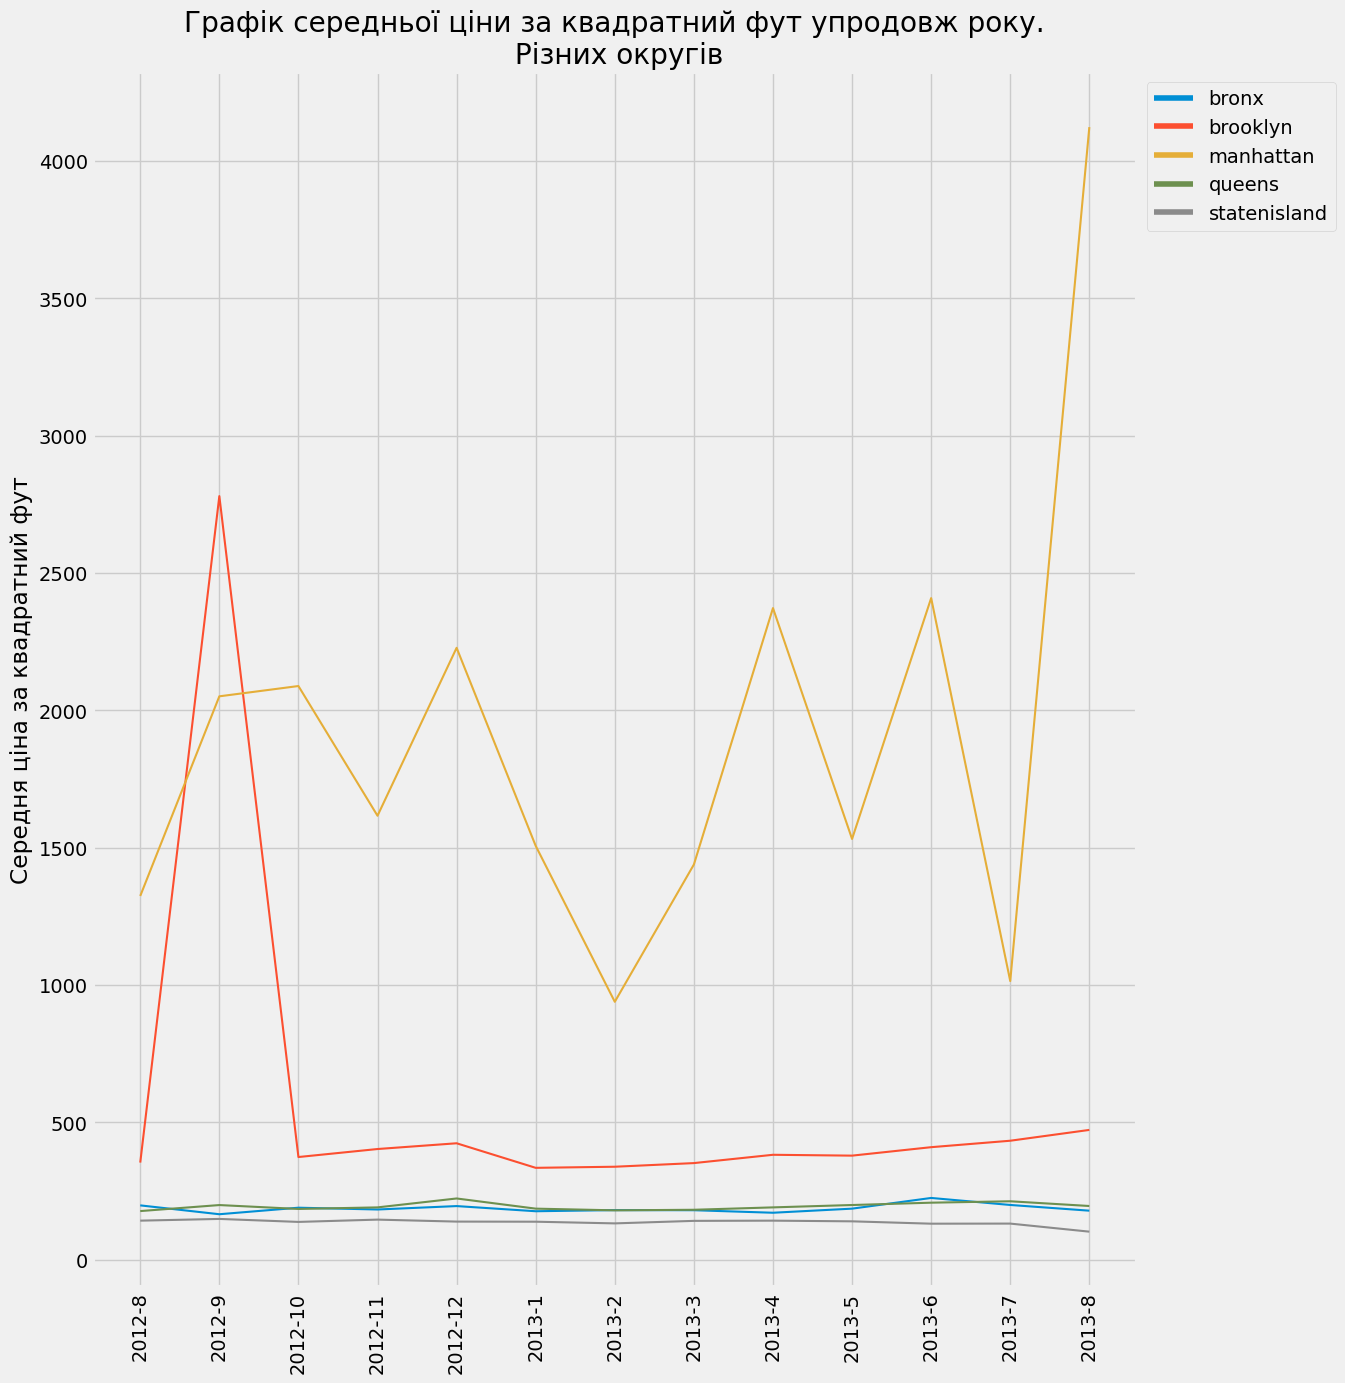

In [56]:
group_by_borough_months = datas.groupby(["borough",datas["sale_date"].dt.year, datas["sale_date"].dt.month]).mean()
price_dict = group_by_borough_months.price_per_feet.to_dict()
dates_list = ['2012-8', '2012-9', '2012-10', '2012-11', '2012-12', '2013-1', '2013-2', '2013-3', '2013-4', '2013-5',
              '2013-6', '2013-7', '2013-8']
df_dict={}
array=[]
prev_key=""
for key, value in price_dict.items():
    if key[0]!=prev_key:
        array=[]
    array.append(value)
    df_dict[key[0]]=array
    prev_key=key[0]

fig,ax = plt.subplots(figsize=[12,15])
ax = sns.lineplot(data=df_dict, linewidth=1.5, dashes=False)
ax.set_xticks(range(len(dates_list)))
ax.set_xticklabels(labels=dates_list, rotation=90)
ax.set(title="Графік середньої ціни за квадратний фут упродовж року.\n Різних округів", xlabel="", ylabel="Середня ціна за квадратний фут")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


new value
new value
new value


C:\Users\garik\AppData\Local\Temp\ipykernel_11780\3582018765.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=dates_list, rotation=90)


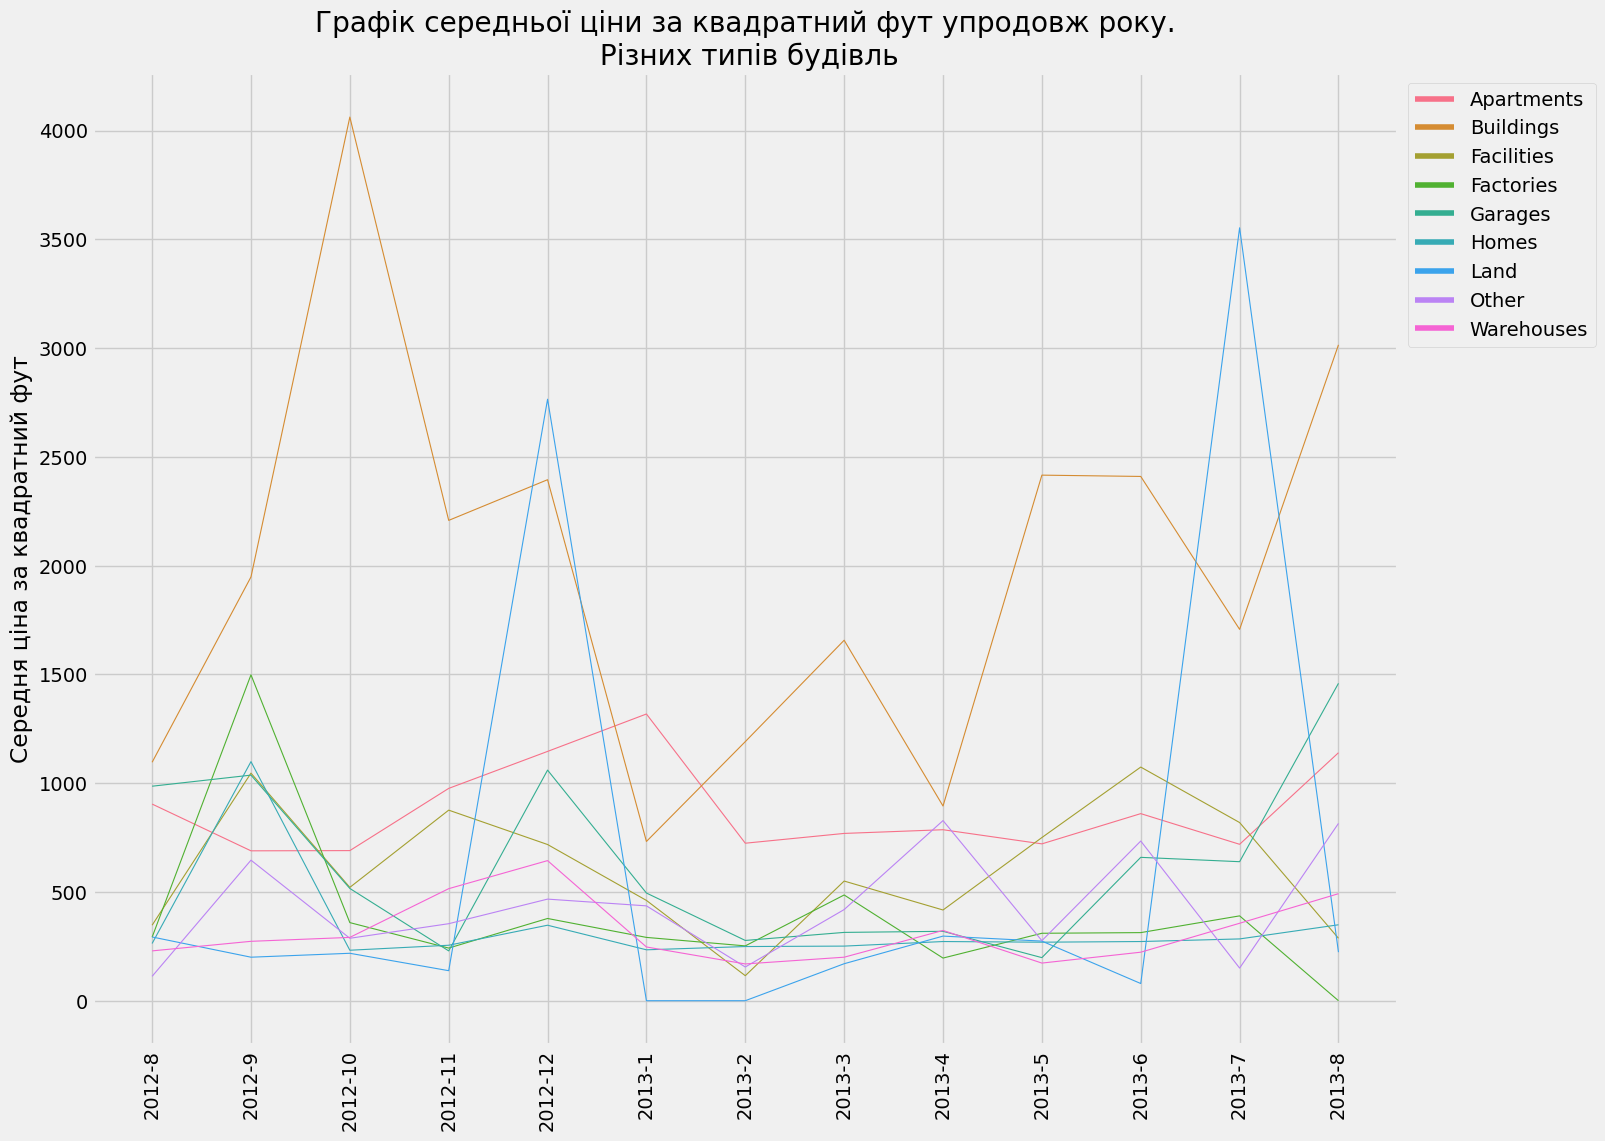

In [3]:
from collections import OrderedDict
group_by_borough_months = datas.groupby(
    ["type_building", datas["sale_date"].dt.year, datas["sale_date"].dt.month]).mean()
dict = group_by_borough_months.price_per_feet.to_dict()
dicts = {}
dates_list = ['2012-8', '2012-9', '2012-10', '2012-11', '2012-12', '2013-1', '2013-2', '2013-3', '2013-4', '2013-5',
              '2013-6', '2013-7', '2013-8']
type_ = set(datas.type_building)
array = []
prev_key = ""
new_dict={}  
for type_key in type_:
    for date in dates_list:
        date_key = date.split("-")
        newkey = (type_key, int(date_key[0]), int(date_key[1]))
        if newkey not in dict.keys():
            print('new value')
            dict[newkey] = 0
dict = OrderedDict(sorted(dict.items()))

for key, value in dict.items():
    name_type = key[0].lstrip(); 
    if name_type!=prev_key:
        array=[]
    array.append(round(value))
    dicts[key[0]]=array
    prev_key=name_type
fig, ax=plt.subplots(figsize=(15,12))
ax=sns.lineplot(data=dicts,
                linewidth=0.8, dashes=False)
ax.set_xticklabels(labels=dates_list, rotation=90)
ax.set_xticks(range(len(dates_list)))
ax.set(title="Графік середньої ціни за квадратний фут упродовж року.\n Різних типів будівль", xlabel="", ylabel="Середня ціна за квадратний фут")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))